### Prosper

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

: 

In [113]:
folders = ['Bondora','Home credit','Prosper','Zopa']
# data_names = ['bondora','hcredit','prosper','zopa']
files = ['Bondora_LoanData','application_train','prosperLoanData','zopa_data_for_loanbook_extract_2020-04-01']
columns_to_drop = {'Prosper':['ListingKey', 'ListingNumber','LoanKey','LoanNumber','MemberKey','GroupKey']}
target_columns = {'Prosper':['LoanStatus']}
columns_to_pct = {'Prosper':['MonthlyLoanPayment','LP_CustomerPayments','LP_CustomerPrincipalPayments','LP_InterestandFees',
                             'LP_ServiceFees','LP_CollectionFees','LP_GrossPrincipalLoss','LP_NetPrincipalLoss','LP_NonPrincipalRecoverypayments']}
scaler_columns = {'Prosper':'LoanOriginalAmount'}

In [109]:
i=2
data = pd.read_csv('data/'+folders[i]+'/'+files[i]+'.csv', low_memory=False)
for col in columns_to_pct[folders[i]]:
    data[col+' (%)'] = data[col] / data[scaler_columns[folders[i]]]
folders[i]

'Prosper'

In [41]:
np.unique(data.LoanStatus)

array(['Cancelled', 'Chargedoff', 'Completed', 'Current', 'Defaulted',
       'FinalPaymentInProgress', 'Past Due (1-15 days)',
       'Past Due (16-30 days)', 'Past Due (31-60 days)',
       'Past Due (61-90 days)', 'Past Due (91-120 days)',
       'Past Due (>120 days)'], dtype=object)

In [102]:
data.shape

(113937, 90)

In [30]:
data.columns.shape

(14,)

In [ ]:
for col in data.columns:
    print(col+',')

In [ ]:
plt.hist(data.Investors[data.Investors>1],int(np.sqrt(len(data.Investors[data.Investors>1]))));
# plt.hist(data.LoanStatus)

: 

In [ ]:
vars = ['Term', 'LoanStatus', 'ProsperRating (numeric)', 'ProsperScore', 'LoanOriginationDate', 'Investors']
for var in vars:
    if var == 'LoanOriginationDate':
        labels, counts = np.unique(np.array([eval(data[var][i][:4]) for i in range(len(data[var]))]), return_counts=True)
    else:
        labels, counts = np.unique(data[var], return_counts=True)
    plt.bar(labels, counts, align='center')
    plt.title(var)
    # plt.xlabel('Year')
    # plt.xticks(np.unique([eval(data.LoanOriginationDate[i][:4]) for i in range(len(data.LoanOriginationDate))]))
    plt.ylabel('Number of loans')
    plt.show()

In [42]:
#checking the existing var types
list(np.unique(data.dtypes))

[dtype('bool'), dtype('int64'), dtype('float64'), dtype('O')]

In [95]:
#checking the vars with a specific data type
data.dtypes[(data.dtypes=='int64') | (data.dtypes=='float64')].index

Index(['Original Loan Amount', 'Principal Collected', 'Interest Collected',
       'Total number of payments', 'Term', 'Lending rate'],
      dtype='object')

In [142]:
A=pd.DataFrame(np.unique(data[target_columns[folders[i]]]),columns=target_columns[folders[i]])
A.index[A.LoanStatus=='Defaulted']
A

,LoanStatus
0,Cancelled
1,Chargedoff
2,Completed
3,Current
4,Defaulted
5,FinalPaymentInProgress
6,Past Due (1-15 days)
7,Past Due (16-30 days)
8,Past Due (31-60 days)
9,Past Due (61-90 days)


Text(0.5, 1.0, 'Prosper (correlation matrix)')

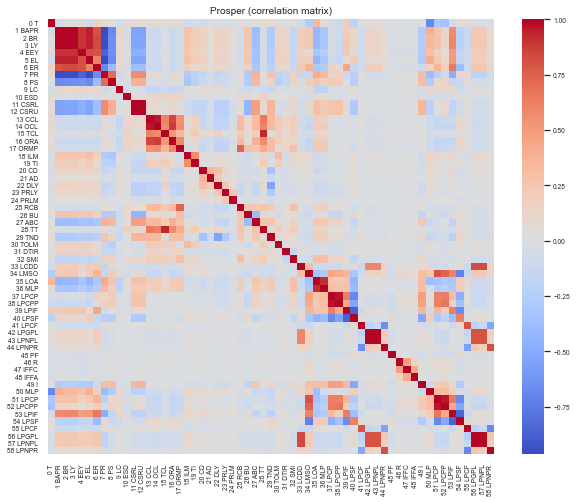

In [110]:
#extract numerical vars
# data2 = pd.DataFrame()
data2 = data
data2 = data2.drop(columns=list(set(columns_to_drop[folders[i]]) | set(data.count().index[data.count()<0.5*len(data)]) | set(data.columns[(data.dtypes != 'int64') & (data.dtypes != 'float64')])))
data2[target_columns]
data2 = data2.dropna().reset_index(drop=True)
data2_std = (data2 - np.mean(data2,axis=0)) / np.std(data2,axis=0)
# data3 = pd.DataFrame(np.corrcoef(data2_std.T), index=data2.columns, columns=data2.columns)
# fig, ax = plt.subplots(figsize=(10,8))
# sns.heatmap(data3,cmap='vlag');#,annot=np.corrcoef(data2_std.T))

new_labels = []
for j,s in enumerate(data2_std.columns):
    new_labels.append(str(j)+' '+''.join([c for c in s if c.isupper()]))

fig, ax = plt.subplots(figsize=(10,8)); sns.set_theme(font_scale=.6)
sns.heatmap(data2_std.corr(), cmap='coolwarm', annot_kws={"size": 10}, xticklabels=new_labels, yticklabels=new_labels)#, linewidths=.05, linecolor='gray');
plt.title(folders[i]+' (correlation matrix)', fontsize=10)
# np.corrcoef(data2_std.T)

In [ ]:
# do pca analysis and do unsupervisd clustering

In [ ]:
for _,col in enumerate(data2_std.columns):
    print(_,col)
    exec('F%s = data2_std[col][(data2_std[col] < 3) & (data2_std[col] > -3)]' % _)

0 Term
1 BorrowerAPR
2 BorrowerRate
3 LenderYield
4 EstimatedEffectiveYield
5 EstimatedLoss
6 EstimatedReturn
7 ProsperRating (numeric)
8 ProsperScore
9 ListingCategory (numeric)
10 EmploymentStatusDuration
11 CreditScoreRangeLower
12 CreditScoreRangeUpper
13 CurrentCreditLines
14 OpenCreditLines
15 TotalCreditLinespast7years
16 OpenRevolvingAccounts
17 OpenRevolvingMonthlyPayment
18 InquiriesLast6Months
19 TotalInquiries
20 CurrentDelinquencies
21 AmountDelinquent
22 DelinquenciesLast7Years
23 PublicRecordsLast10Years
24 PublicRecordsLast12Months
25 RevolvingCreditBalance
26 BankcardUtilization
27 AvailableBankcardCredit
28 TotalTrades
29 TradesNeverDelinquent (percentage)
30 TradesOpenedLast6Months
31 DebtToIncomeRatio
32 StatedMonthlyIncome
33 LoanCurrentDaysDelinquent
34 LoanMonthsSinceOrigination
35 LoanOriginalAmount
36 MonthlyLoanPayment
37 LP_CustomerPayments
38 LP_CustomerPrincipalPayments
39 LP_InterestandFees
40 LP_ServiceFees
41 LP_CollectionFees
42 LP_GrossPrincipalLoss
43

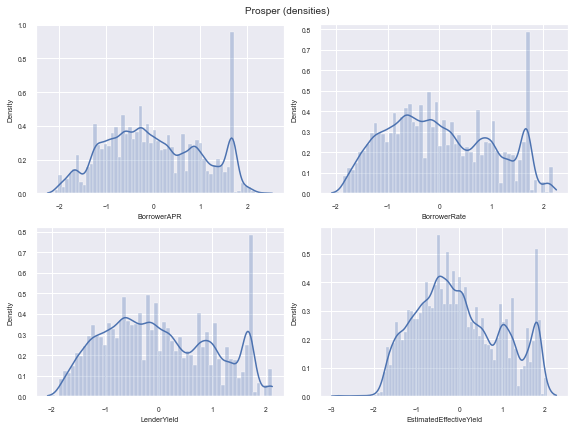

In [63]:
fig, ax = plt.subplots(2,2,figsize=(8,6))
# for f in range(16):
# selected_features = np.random.choice(50,16)
# selected_features = np.arange(32,48)
selected_features = [1,2,3,4]#,5,6,10,15,17,28,31,32,34,36,37,38]
for _,f in enumerate(selected_features):
    sns.histplot(eval('F%s' % f),kde=True,label=data2_std.columns[f],stat="density",alpha=0.3, ax=ax[int(np.floor(_/2)),_%2])
    # ax[int(np.floor(f/4)),f%4].set_title(data2_std.columns[f])
plt.suptitle(folders[i]+' (densities)', fontsize=10)
plt.tight_layout()

* Data is not labeled as far as I can see. So this can make the feature selection process 
* Did not perform any dimensionality reduction
* 

      name     score       loc     scale  \
0     beta  1.027083 -2.248208  4.777828   
1  lognorm   1.05917  -8.87574  8.819492   
2    gamma  1.061473 -7.178755  0.140248   

                                        arg  \
0  (2.1630558240164452, 2.1920411144741014)   
1                    (0.11287946025612484,)   
2                       (51.1568507522197,)   

                                              params  
0  (2.1630558240164452, 2.1920411144741014, -2.24...  
1  (0.11287946025612484, -8.875739934763393, 8.81...  
2  (51.1568507522197, -7.178755222638735, 0.14024...  
      name     score       loc     scale  \
0     beta  0.775469 -2.076292  4.361633   
1    gamma  0.828757 -2.755783  0.386385   
2  lognorm  0.855716 -5.086844  4.988763   

                                       arg  \
0  (1.8859612286903538, 2.035232990547981)   
1                     (7.132226925558278,)   
2                   (0.19804406697028049,)   

                                              params

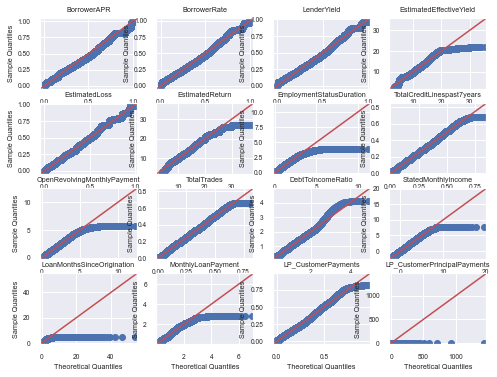

In [104]:
fig, ax = plt.subplots(4,4,figsize=(8,6))
from distfit import distfit
import statsmodels.api as sm
from scipy import stats
for _,f in enumerate(selected_features):
    dist = distfit()
    dist.fit_transform(eval('F%s' % f), verbose = 0)
    # print(dist.summary.loc[:2,['name','score']])
    print(dist.summary.iloc[:3,:6])
    sm.qqplot(eval('F%s' % f), eval('stats.%s' % dist.summary.loc[0,'name']), fit=True, line='45',ax=ax[int(np.floor(_/4)),_%4])
    ax[int(np.floor(_/4)),_%4].set_title(data2_std.columns[f])
# dist.plot()

In [103]:
dist.summary.loc[0,'name']

'beta'

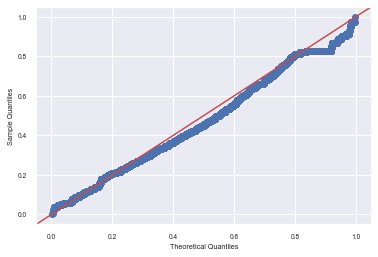

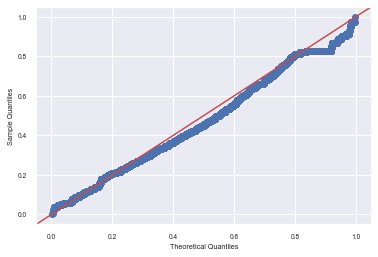

In [101]:
import statsmodels.api as sm
from scipy import stats
sm.qqplot(F1, stats.beta, fit=True, line="45")

[distfit] >INFO> Create pdf plot for the parametric method.
[distfit] >INFO> Estimated distribution: Expon(loc:-1.076975, scale:1.018667)


(<Figure size 1440x1080 with 1 Axes>,
 <Axes: title={'center': '\nexpon(loc=-1.07697, scale=1.01867)'}, xlabel='Values', ylabel='Frequency'>)

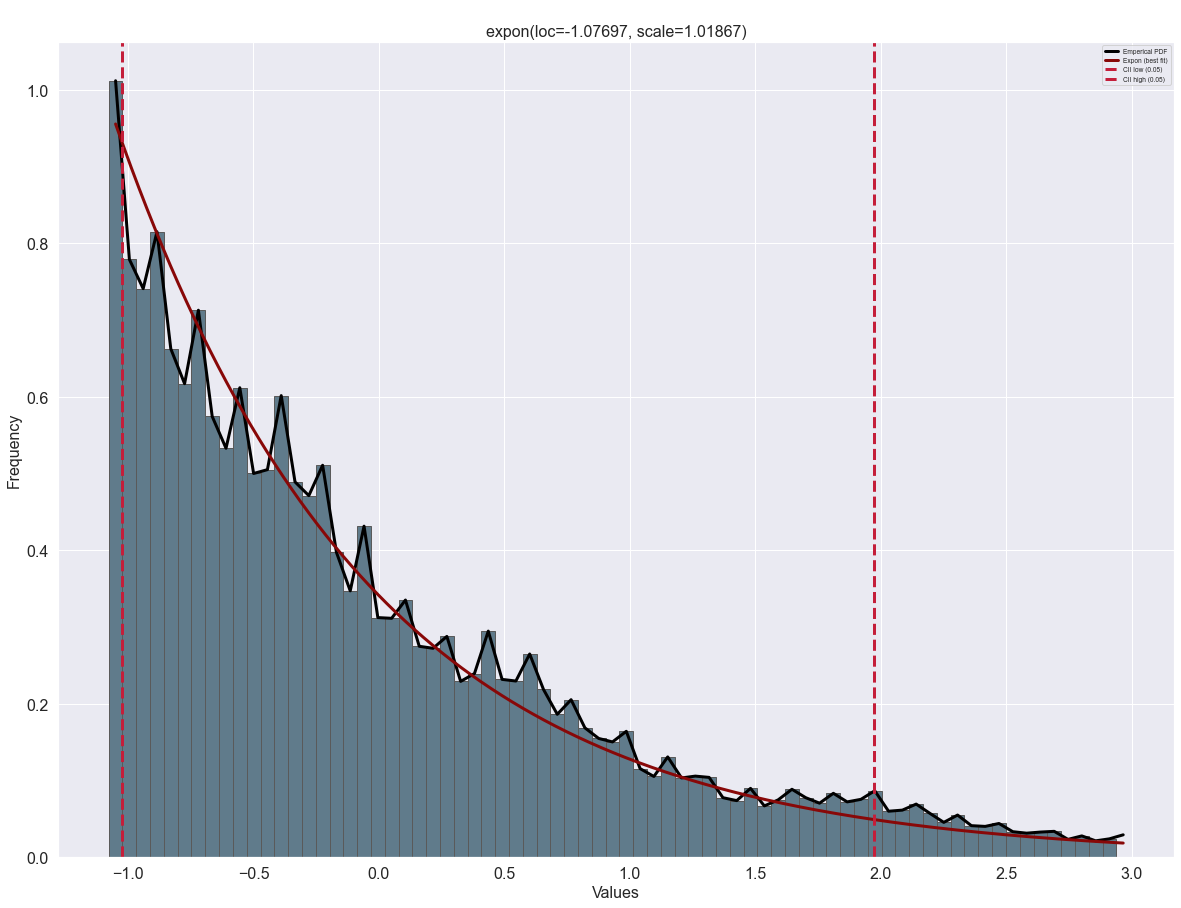

In [31]:
dist.plot()